# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [10]:
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

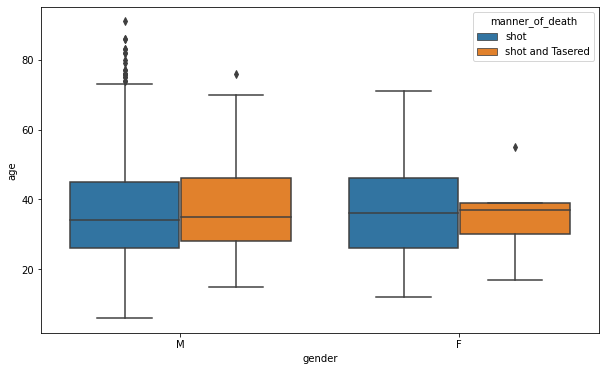

In [7]:
# with seaborn


fig, ax = plt.subplots(figsize=(10, 6))


sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df, ax=ax);

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

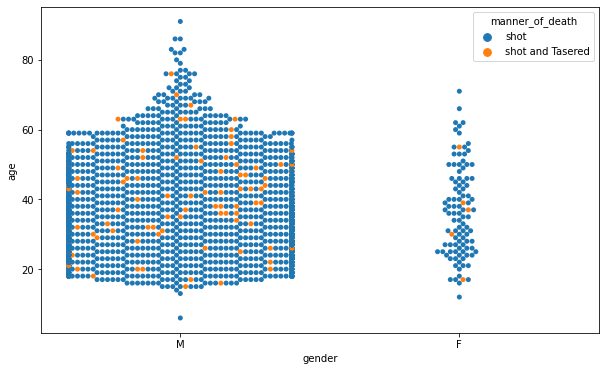

In [31]:
# with seaborn

fig, ax = plt.subplots(figsize=(10, 6))

sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill);

## 2: Plot 12 most dangerous cities

In [61]:
df.dropna(inplace=True)

In [63]:
city_freq = df.city.value_counts()[:12]
city_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

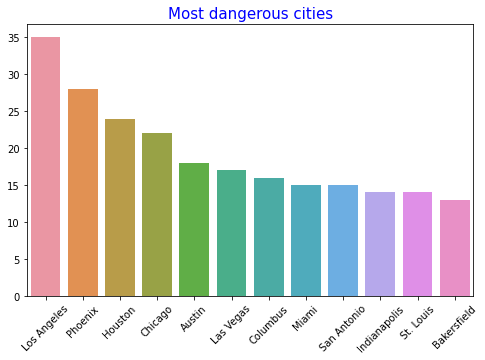

In [64]:
# with seaborn barplot

fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(x=city_freq.index, y=city_freq.values)

ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities', color='blue', fontsize=15);

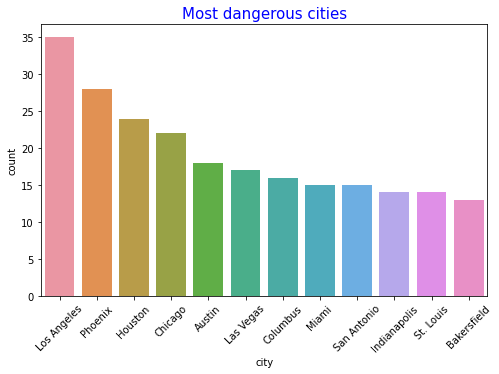

In [65]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8, 5))

sns.countplot(x="city", 
              data=df,
              order=city_freq.index)

ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities', color='blue', fontsize=15);

## 3: Plot 20 most dangerous states

In [24]:
df.dropna(inplace=True)

In [25]:
state_freq = df.state.value_counts()[:20]
state_freq

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

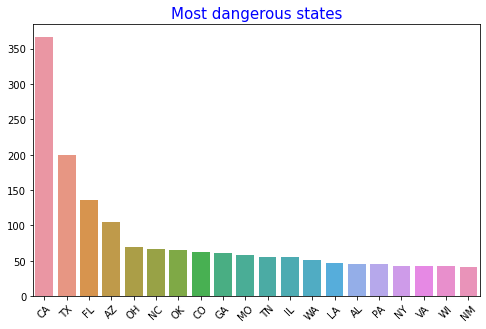

In [40]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(x=state_freq.index, y=state_freq.values)

ax.set_xticklabels(state_freq.index, rotation=45)
ax.set_title('Most dangerous states', color='blue', fontsize=15);

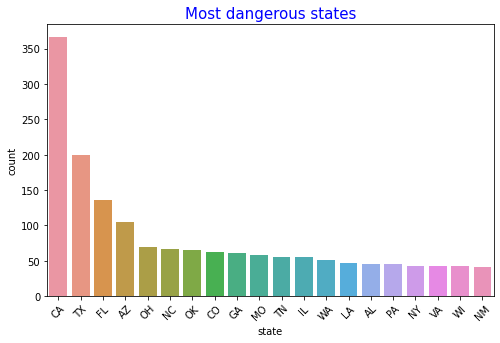

In [39]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(x="state", 
              data=df,
              order=state_freq.index)

ax.set_xticklabels(state_freq.index, rotation=45)
ax.set_title('Most dangerous states', color='blue', fontsize=15);

## 4: Plot Having mental ilness or not for killed people

In [28]:
df.dropna(inplace=True)

In [29]:
illness = df['signs_of_mental_illness'].value_counts()
illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

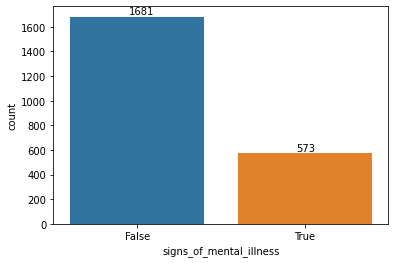

In [41]:
# with seaborn
fig, ax = plt.subplots()

sns.countplot(df.signs_of_mental_illness)

# you can add

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

## 5: Plot number of Threat Types

In [32]:
df.dropna(inplace=True)

In [33]:
threads_freq = df['threat_level'].value_counts()
threads_freq

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

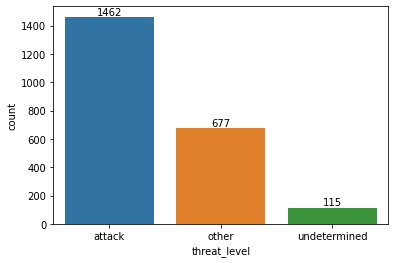

In [38]:
# with seaborn
fig, ax = plt.subplots()

sns.countplot(df.threat_level)

for container in ax.containers:
    ax.bar_label(container)

## 6: Plot number of Flee Types

In [34]:
df.dropna(inplace=True)

In [35]:
flee_freq = df.flee.value_counts()
flee_freq

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

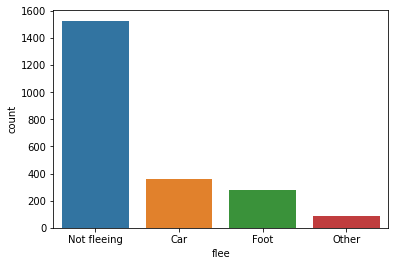

In [37]:
# with seaborn
sns.countplot(df.flee);